In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from util import show_images
from camera_calibration import CameraCalibration
import glob

%matplotlib inline

## Camera Calibration

### Load Original Image

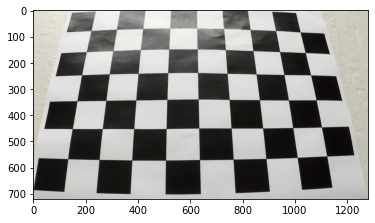

In [2]:
# prepare object points
n_cols = 9
n_rows = 6

# Make a list of calibration images
image_paths = glob.glob('./camera_cal/calibration*.jpg')
img = mpimg.imread(image_paths[4])
plt.imshow(img)

### Finding Corners

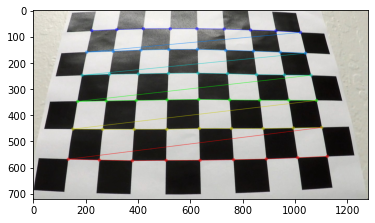

In [3]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (n_cols, n_rows), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (n_cols, n_rows), corners, ret)
    plt.imshow(img)

### Generate Corresponding Points

In [4]:
objpoints = []
imgpoints = []

objp = np.zeros((n_rows * n_cols, 3), np.float32)
objp[:,:2] = np.mgrid[0:n_cols, 0:n_rows].T.reshape(-1, 2)

for image_path in image_paths:
    # read image from image path
    image = mpimg.imread(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (n_cols,n_rows), None)

    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

### Calibrate Camera

In [5]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

### Undistort Image Transformation


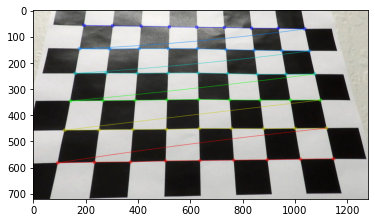

In [6]:
undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undist)
